In [1]:
210904062053
from Classe_sismogramma_v3 import ClasseDataset
D=ClasseDataset()
D.leggi_custom_dataset("/home/silvia/Desktop/Data/DETECT/Detect_data_picked_extended.hdf5","/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_extended.csv")
D.demean()

/home/silvia/Documents/GitHub/primoprogetto/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/silvia/Documents/GitHub/primoprogetto/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
porzione = D.metadata[D.metadata["source_id"]==210904062053]
indici_ev = list(porzione.index)
porzione

In [ ]:
import numpy as np
import _Library_HOS
from obspy import UTCDateTime
import matplotlib.pyplot as plt
onsets_th = []
semiamp = 400
window_size = 200
for i in range(len(indici_ev)):
    sig = _Library_HOS.freq_filter(D.sismogramma[indici_ev[i]], 100, [1,20], type_filter= "bandpass")
    arrivo = D.metadata["trace_P_arrival_sample"][indici_ev[i]]

    or_time = "2021-09-04T06:20:53.000000Z"
    os = (UTCDateTime(or_time)- UTCDateTime(D.metadata["trace_start_time"][indici_ev[i]]))*D.metadata["sampling_rate"][indici_ev[i]]

    onset_th, diff, onset_max,u  = _Library_HOS.get_onset_3(sig, window_size, threshold=[0.1,0.2,0.3,0.8], statistics= _Library_HOS.S_4, origin_sample=int(os))
    onsets_th.append(onset_th)

    titolo = f"{D.metadata['trace_name'][indici_ev[i]]}"
    figura, axis = plt.subplots(2,1,figsize=(10,8))

    axis[0].plot(sig[arrivo-semiamp:arrivo+semiamp])
    min_ = np.min(sig[arrivo-semiamp:arrivo+semiamp])
    max_ = np.max(sig[arrivo-semiamp:arrivo+semiamp])
    axis[0].vlines(semiamp,min_,max_,color="green",linestyle="--")
    axis[0].vlines(onset_th[3]-(arrivo-semiamp),min_,max_,color="red",linestyle="--")


    axis[1].plot(diff[arrivo-semiamp- window_size:arrivo+semiamp-window_size])
    min_ = np.min(diff[arrivo-semiamp:arrivo+semiamp])
    max_ = np.max(diff[arrivo-semiamp:arrivo+semiamp])
    axis[1].vlines(onset_th[3]-(arrivo-semiamp),min_,max_,color="red",linestyle="--")
    axis[1].vlines(semiamp,min_,max_,color="green",linestyle="--")


    figura.savefig(f"/home/silvia/Desktop/evento_prova2_filtrate/{indici_ev[i]}.png")
    figura.clf()


In [2]:
import pandas as pd
from obspy import UTCDateTime
pd.read_csv("/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_extended.csv")["source_origin_time"][0]

'2021-09-01 01:21:18'

In [7]:
UTCDateTime('2021-09-04 06:20:23.000000Z')
# trmpo origine 2021-09-04T06:20:53.000000Z

2021-09-04T06:20:23.000000Z

# OGGI


In [3]:
i= 500

In [63]:
i+=25

In [64]:
# VEDI QUANTO E std per diff(hos) per i = 302 308
import numpy as np
import numpy as np
import _Library_HOS
from obspy import UTCDateTime
import matplotlib.pyplot as plt
window_size = 300
sig = _Library_HOS.freq_filter(D.sismogramma[i], 100, [1,20], type_filter= "bandpass")
arrivo = D.metadata["trace_P_arrival_sample"][i]


os = (UTCDateTime(D.metadata["source_origin_time"][i])- UTCDateTime(D.metadata["trace_start_time"][i]))*D.metadata["sampling_rate"][i]

onset_th, diff, onset_max,u  = _Library_HOS.get_onset_3(sig, window_size, threshold=[0.1,0.2,0.3,0.8,1], statistics= _Library_HOS.S_4, origin_sample=int(os))
onset_th
i+=1
arrivo,onset_th,onset_max

(6318, [6358, 6359, 6388, 6389, -1], 6389)

In [47]:
diff[6953]

0.030802433258086848

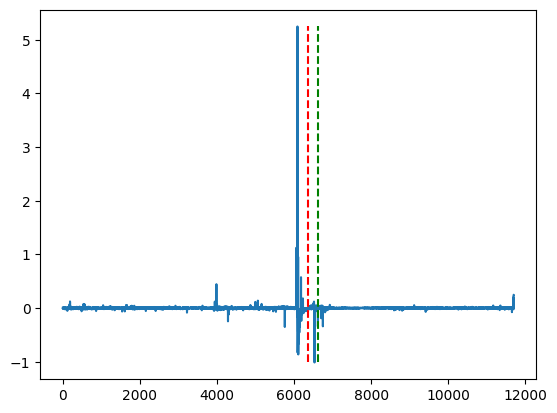

In [65]:
plt.plot(diff)
min_ = np.min(diff)
max_ = np.max(diff)
plt.vlines(6627,min_,max_,color="green", label = "arrivo", linestyles="--")
plt.vlines(onset_th[1],min_,max_,color="red", label = "arrivo", linestyles="--")

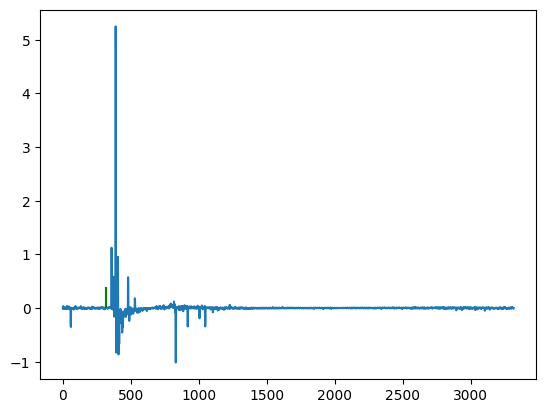

In [66]:
plt.plot(diff[int(os-window_size):arrivo+-window_size+3000])
plt.vlines(arrivo-window_size-int(os-window_size),0,0.4,color="green", label = "arrivo")

In [434]:
i

308

[6358, 6359, 6388, 6389, -1]

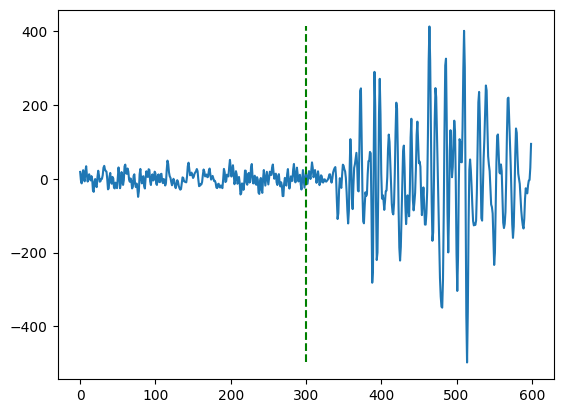

In [68]:
#plt.plot(sig)
import numpy as np
s = 300
plt.plot(sig[arrivo-s:arrivo+s])
min_ = np.min(sig[arrivo-s:arrivo+s])
max_ = np.max(sig[arrivo-s:arrivo+s])
plt.vlines(s,min_,max_,color="green", label = "arrivo", linestyles="--")
#plt.vlines(onset_th[1]+s-arrivo,min_,max_,color="red", label = "arrivo", linestyles="--")

onset_th

#plt.plot(sig[onset_max-300:onset_max+300])


In [48]:
diff[onset_max-300]

0.9511579717442595

In [140]:
lower_bound = arrivo
uuio = np.argmax(diff[lower_bound:]) + lower_bound

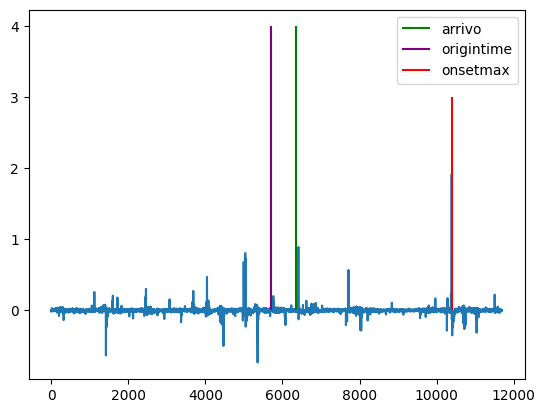

In [132]:
plt.plot(diff)
plt.vlines(arrivo-window_size,0,4,color="green", label = "arrivo")
plt.vlines(os-window_size,0,4,color="purple",label="origintime")
plt.vlines(onset_max- window_size,0,3,color="red",label="onsetmax")
plt.legend()

In [154]:
arrivs = []
for j in range(len(D.sismogramma)):
    arrivs.append((UTCDateTime(D.metadata["source_origin_time"][j])- UTCDateTime(D.metadata["trace_start_time"][j]))*D.metadata["sampling_rate"][j])

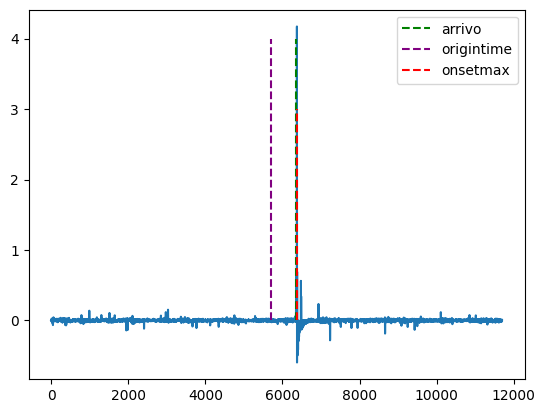

In [6]:
plt.plot(diff[:])
plt.vlines(arrivo-window_size,0,4,color="green", label = "arrivo", linestyles="--")
plt.vlines(os-window_size,0,4,color="purple",label="origintime", linestyles="--")
plt.vlines(onset_max- window_size,0,3,color="red",label="onsetmax", linestyles="--")
plt.legend()